### 2. In this question you will implement and compare the following different KNN variants (see: https://youtu.be/C9HQLyXwEw0?t=3382)
LSH (1 marks)
KD-tree (1 marks)
Naive version of KNN (0.5 marks)

Vary dataset size $N$, number of dimensions $D$ to do training and testing time and memory comparison for finding $K$ nearest neighbours. (1 mark)
Now, in a 2d randomly generated dataset visually show how many of the $K$ closest neighbors appx. $K$ NN methods miss out due to their approximate nature. 

Also show the partitions in the 2d space. (0.5 marks)

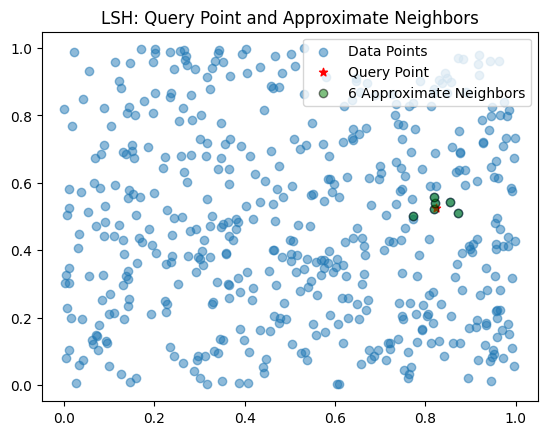

Indices of Approximate Neighbors: [195 342  56 319 241 421]
Distances to Approximate Neighbors: [0.00594341 0.01529986 0.03312222 0.03634306 0.05159113 0.05538169]
Query Time (in seconds): 0.0009789466857910156
Memory Usage (in bytes): 8304


In [ ]:
# LSH implementation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import sys
import time

class LSH:
    def __init__(self, n_planes, n_hash_tables):
        self.n_planes = n_planes  
        self.n_hash_tables = n_hash_tables  
        self.hash_tables = [{} for _ in range(n_hash_tables)]
        self.planes = [np.random.randn(n_planes, D) for _ in range(n_hash_tables)]

    def _hash(self, data, planes):
        return tuple((np.dot(data, planes.T) > 0).astype(int))

    def fit(self, data):
        self.data = data
        for i, table in enumerate(self.hash_tables):
            hashes = [self._hash(point, self.planes[i]) for point in data]
            for idx, h in enumerate(hashes):
                if h not in table:
                    table[h] = []
                table[h].append(idx)

    def query(self, query_point, k):
        candidates = set()
        for i, table in enumerate(self.hash_tables):
            h = self._hash(query_point, self.planes[i])
            candidates.update(table.get(h, []))
        candidates = np.array(list(candidates))
        if len(candidates) == 0:
            return [], []
        distances = euclidean_distances(query_point.reshape(1, -1), self.data[candidates])
        nearest_indices = np.argsort(distances.flatten())[:k]
        return candidates[nearest_indices], distances.flatten()[nearest_indices]

    def time_query(self, query_point, k):
        start_time = time.time()
        indices, distances = self.query(query_point, k)
        end_time = time.time()
        return indices, distances, end_time - start_time

    
    def compute_memory_usage(self):
        hash_tables_size = sys.getsizeof(self.hash_tables)
        planes_size = sys.getsizeof(self.planes)
        data_size = sys.getsizeof(self.data)
        total_size = data_size + hash_tables_size + planes_size
        return total_size


N_data = 500  
D = 2        
k = 6        
n_planes = 5  
n_hash_tables = 3  


data_points = np.random.rand(N_data, D)
query_point = np.random.rand(1, D).flatten()


lsh = LSH(n_planes=n_planes, n_hash_tables=n_hash_tables)
lsh.fit(data_points)


indices, distances, query_time = lsh.time_query(query_point, k)


plt.scatter(data_points[:, 0], data_points[:, 1], label="Data Points", alpha=0.5)
plt.scatter(query_point[0], query_point[1], label="Query Point", color="red", marker="*")
plt.scatter(
    data_points[indices, 0], data_points[indices, 1],
    label=f"{k} Approximate Neighbors", color="green", edgecolor="black", alpha=0.5)
plt.legend()
plt.title("LSH: Query Point and Approximate Neighbors")
plt.show()


memory_usage = lsh.compute_memory_usage()


print("Indices of Approximate Neighbors:", indices)
print("Distances to Approximate Neighbors:", distances)
print("Query Time (in seconds):", query_time)
print("Memory Usage (in bytes):", memory_usage)


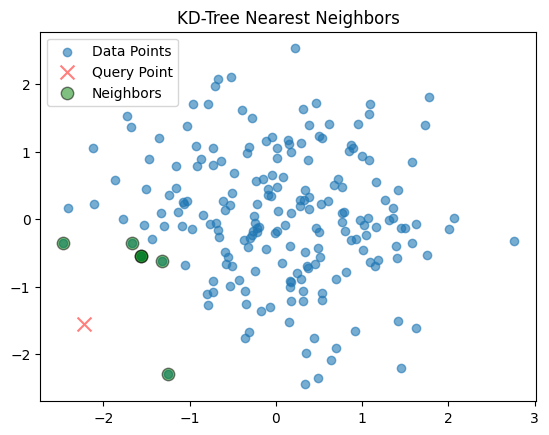

Indices of Neighbors: [165 115   0 167   1 171]
Distances to Neighbors: [1.20517209 1.2123565  1.21811348 1.23174965 1.30169577 1.3237263 ]
Testing Time (in seconds): 0.0001430511474609375
Memory Usage (in bytes): 4488


In [ ]:
#KD Trees

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
import time
import sys
from sklearn.metrics.pairwise import euclidean_distances

class KDTreeNN:
    def __init__(self):
        self.kd_tree = None
        self.data = None

    def fit(self, data):
        self.data = data
        self.kd_tree = KDTree(data)  

    def query(self, query_point, k):
        start_time = time.time() 
        dist, indices = self.kd_tree.query(query_point.reshape(1, -1), k)  
        end_time = time.time() 
        return indices.flatten(), dist.flatten(), end_time - start_time

    def plot_kd_tree(self, data, query=None, neighbors=None):
        plt.scatter(data[:, 0], data[:, 1], label="Data Points", alpha=0.6)
        if query is not None:
            plt.scatter(query[0], query[1], label="Query Point", color="red", marker="x", s=100, alpha=0.5)
        if neighbors is not None:
            plt.scatter(data[neighbors, 0], data[neighbors, 1],
                        label="Neighbors", color="green", edgecolor="black", s=80, alpha=0.5)
        
        plt.legend()
        plt.title("KD-Tree Nearest Neighbors")
        plt.show()

    def compute_memory_usage(self):
        tree_size = sys.getsizeof(self.kd_tree)
        data_size = sys.getsizeof(self.data)
        total_size = data_size + tree_size
        return total_size


N_data = 200 
D = 2    
k = 6     


def generate_data(N, D):
    return np.random.randn(N, D)


data_points = generate_data(N_data, D)
query_point = np.random.randn(1, D).flatten()

kd_tree_nn = KDTreeNN()
kd_tree_nn.fit(data_points)
indices, distances, testing_time = kd_tree_nn.query(query_point, k)
kd_tree_nn.plot_kd_tree(data_points, query=query_point, neighbors=indices)
memory_usage = kd_tree_nn.compute_memory_usage()

print("Indices of Neighbors:", indices)
print("Distances to Neighbors:", distances)
print("Testing Time (in seconds):", testing_time)
print("Memory Usage (in bytes):", memory_usage)


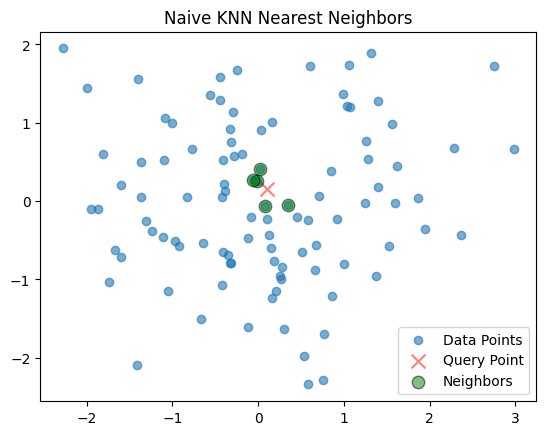

Indices of Neighbors: [19 65 63 98 42]
Distances to Neighbors: [0.16097545 0.20444985 0.2111409  0.28049626 0.31188409]
Testing Time (in seconds): 0.0007271766662597656
Memory Usage (in bytes): 1728


In [ ]:
#Naive KNN

import numpy as np
import matplotlib.pyplot as plt
import time
import sys
from sklearn.metrics.pairwise import euclidean_distances

class NaiveKNN:
    def __init__(self):
        self.data = None

    def fit(self, data):
        self.data = data 

    def query(self, query_point, k):
        start_time = time.time() 
        distances = euclidean_distances(query_point.reshape(1, -1), self.data).flatten()
        indices = np.argsort(distances)[:k]
        dist = distances[indices]
        end_time = time.time()
        return indices, dist, end_time - start_time

    def plot_naive_knn(self, data, query=None, neighbors=None):
        plt.scatter(data[:, 0], data[:, 1], label="Data Points", alpha=0.6)
        if query is not None:
            plt.scatter(query[0], query[1], label="Query Point", color="red", marker="x", s=100, alpha=0.5)
        if neighbors is not None:
            plt.scatter(data[neighbors, 0], data[neighbors, 1],
                        label="Neighbors", color="green", edgecolor="black", s=80, alpha=0.5)
        
        plt.legend()
        plt.title("Naive KNN Nearest Neighbors")
        plt.show()

    def compute_memory_usage(self):
        data_size = sys.getsizeof(self.data)
        return data_size

N_data = 100 
D = 2         
k = 5         

def generate_data(N, D):
    return np.random.randn(N, D) 
data_points = generate_data(N_data, D)
query_point = np.random.randn(1, D).flatten()

naive_knn = NaiveKNN()
naive_knn.fit(data_points)
indices, distances, testing_time = naive_knn.query(query_point, k)
naive_knn.plot_naive_knn(data_points, query=query_point, neighbors=indices)
memory_usage = naive_knn.compute_memory_usage()

# Print results
print("Indices of Neighbors:", indices)
print("Distances to Neighbors:", distances)
print("Testing Time (in seconds):", testing_time)
print("Memory Usage (in bytes):", memory_usage)


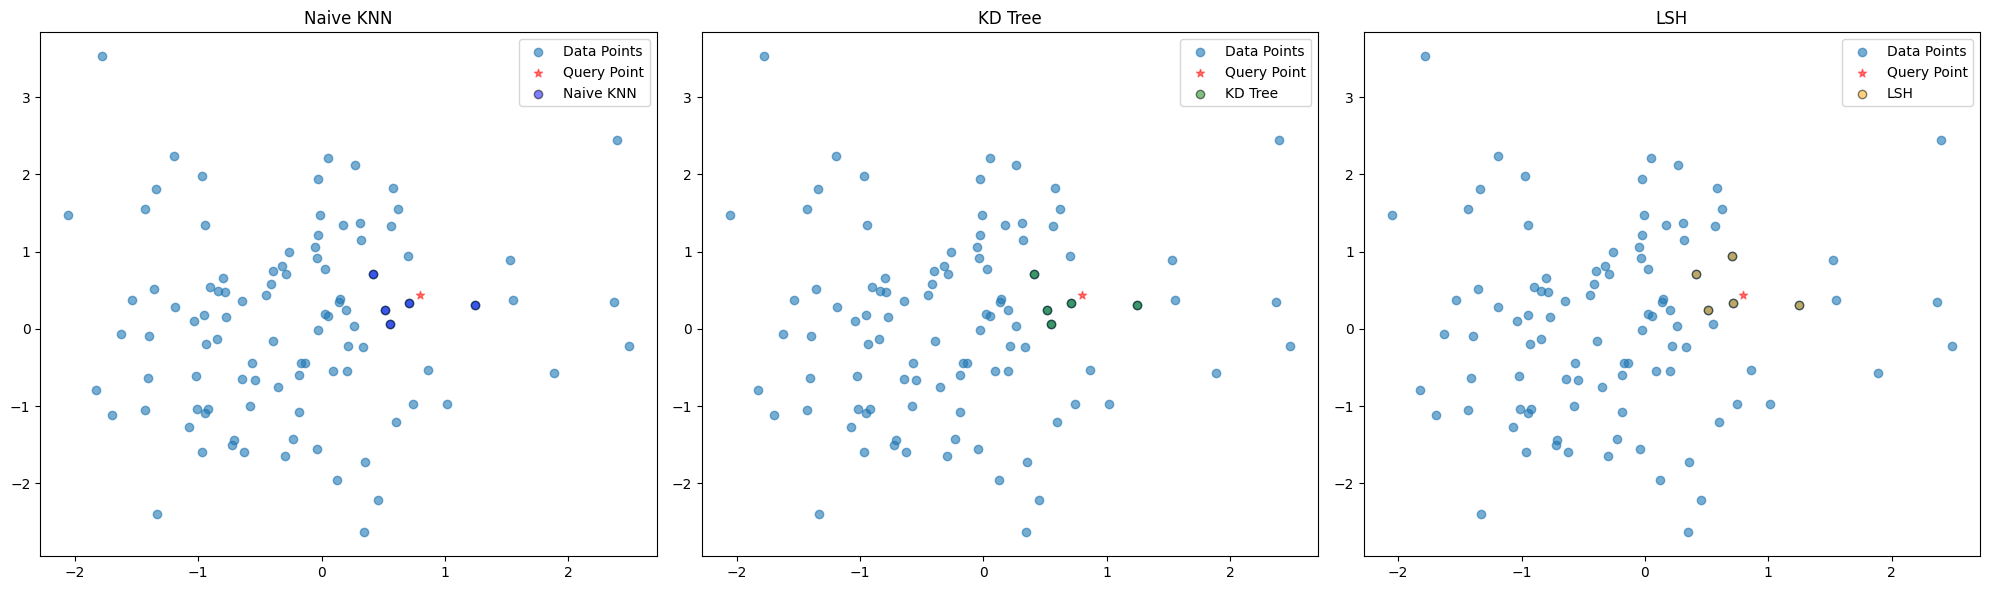

Naive KNN Indices: [38 54 70 39 12]
Naive KNN Distances: [0.13265395 0.34311256 0.44514381 0.46688337 0.47317523]
KD Tree Indices: [38 54 70 39 12]
KD Tree Distances: [0.13265395 0.34311256 0.44514381 0.46688337 0.47317523]
LSH Indices: [38 54 39 12 23]
LSH Distances: [0.13265395 0.34311256 0.46688337 0.47317523 0.51093602]


In [66]:
# Plotting a 2d dataset and comapring all the 3 methods

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KDTree


def generate_data(N, D):
    return np.random.randn(N, D)
N_data = 100  
D = 2         
k = 5       #neighbours  


data_points = generate_data(N_data, D)
query_point = np.random.randn(1, D).flatten()  


naive_knn = NaiveKNN()
naive_knn.fit(data_points)
indices_exact, dist_exact,testing_time = naive_knn.query(query_point, k)

kd_tree_nn = KDTreeNN()
kd_tree_nn.fit(data_points)
indices_approx, dist_approx,testint_time = kd_tree_nn.query(query_point, k)

lsh = LSH(n_planes=n_planes, n_hash_tables=n_hash_tables)
lsh.fit(data_points)
indices_lsh, dist_lsh = lsh.query(query_point, k)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes[0].scatter(data_points[:, 0], data_points[:, 1], label="Data Points", alpha=0.6)
axes[0].scatter(query_point[0], query_point[1], label="Query Point", color="red", marker="*", alpha=0.5)
axes[0].scatter(data_points[indices_exact, 0], data_points[indices_exact, 1],
                label="Naive KNN", color="blue", edgecolor="black", alpha=0.5)
axes[0].set_title("Naive KNN")
axes[0].legend()


axes[1].scatter(data_points[:, 0], data_points[:, 1], label="Data Points", alpha=0.6)
axes[1].scatter(query_point[0], query_point[1], label="Query Point", color="red", marker="*", alpha=0.5)
axes[1].scatter(data_points[indices_approx, 0], data_points[indices_approx, 1],
                label="KD Tree", color="green", edgecolor="black", alpha=0.5)
axes[1].set_title("KD Tree")
axes[1].legend()


axes[2].scatter(data_points[:, 0], data_points[:, 1], label="Data Points", alpha=0.6)
axes[2].scatter(query_point[0], query_point[1], label="Query Point", color="red", marker="*", alpha=0.5)
axes[2].scatter(data_points[indices_lsh, 0], data_points[indices_lsh, 1],
                label="LSH", color="orange", edgecolor="black", alpha=0.5)
axes[2].set_title("LSH")
axes[2].legend()


plt.tight_layout()
plt.show()
print("Naive KNN Indices:", indices_exact)
print("Naive KNN Distances:", dist_exact)
print("KD Tree Indices:", indices_approx)
print("KD Tree Distances:", dist_approx)
print("LSH Indices:", indices_lsh)
print("LSH Distances:", dist_lsh)

In [ ]:
#Defining functions to plot the hyperplanes and recursive split

def kdtree_recursive_split(data, depth=0, bounds=None, ax=None, min_points=5):
    if len(data) <= min_points: 
        return
    
    if bounds is None: 
        bounds = [data[:, 0].min(), data[:, 0].max(), data[:, 1].min(), data[:, 1].max()]
    
    axis = depth % 2 
    sorted_data = data[data[:, axis].argsort()]  
    median_idx = len(sorted_data) // 2  
    
    
    if axis == 0:  
        ax.plot([sorted_data[median_idx, axis], sorted_data[median_idx, axis]],
                [bounds[2], bounds[3]], 'k--', alpha=0.7)
        left_bounds = [bounds[0], sorted_data[median_idx, axis], bounds[2], bounds[3]]
        right_bounds = [sorted_data[median_idx, axis], bounds[1], bounds[2], bounds[3]]
    else: 
        ax.plot([bounds[0], bounds[1]],
                [sorted_data[median_idx, axis], sorted_data[median_idx, axis]], 'k--', alpha=0.7)
        left_bounds = [bounds[0], bounds[1], bounds[2], sorted_data[median_idx, axis]]
        right_bounds = [bounds[0], bounds[1], sorted_data[median_idx, axis], bounds[3]]
    
    
    kdtree_recursive_split(sorted_data[:median_idx], depth + 1, left_bounds, ax, min_points)
    kdtree_recursive_split(sorted_data[median_idx + 1:], depth + 1, right_bounds, ax, min_points)

def plot_lsh_hyperplanes(planes, ax, data_bounds):
    x_min, x_max = data_bounds[0], data_bounds[1]
    y_min, y_max = data_bounds[2], data_bounds[3]

    for i, plane in enumerate(planes):
        x = np.linspace(x_min, x_max, 100)
        if plane[1] != 0: 
            y = -(plane[0] * x + plane[-1]) / plane[1]
            ax.plot(x, y, label=f"Hyperplane {i+1}", alpha=0.7)
    ax.legend()


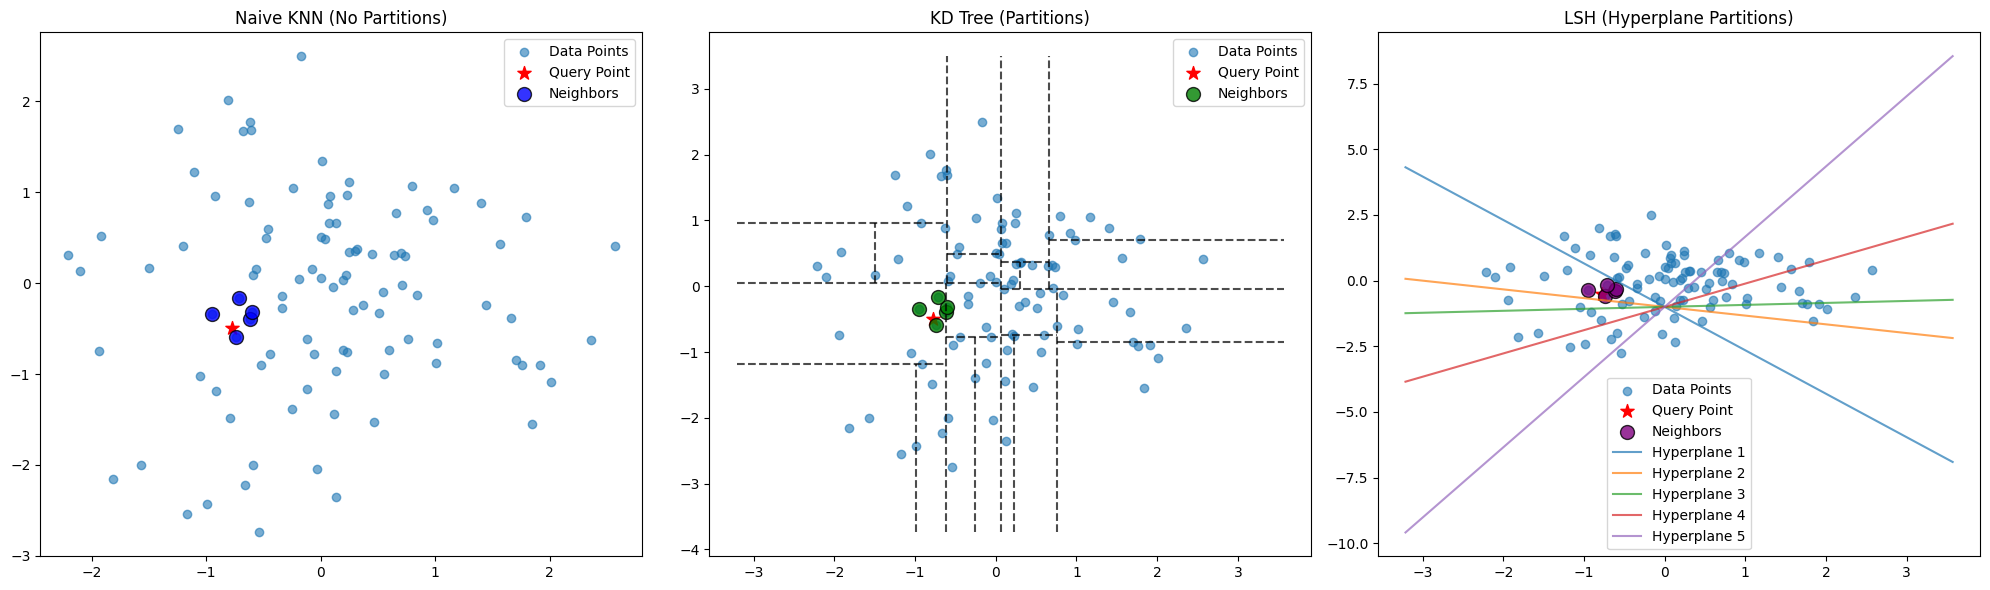

In [60]:
# Visualizing partitions in KD Tree and LSh 

N_data = 100  
D = 2         
k = 5       #neighbours  
n_planes = 5
data_points = generate_data(N_data, D)
query_point = np.random.randn(1, D).flatten()

naive_knn = NaiveKNN()
naive_knn.fit(data_points)

kd_tree_nn = KDTreeNN()
kd_tree_nn.fit(data_points)

lsh = LSH(n_planes=n_planes, n_hash_tables=n_hash_tables)
lsh.fit(data_points)


indices_naive, dist_naive,testing_time = naive_knn.query(query_point, k)
indices_kdtree, dist_kdtree, testing_time = kd_tree_nn.query(query_point, k)
indices_lsh, dist_lsh = lsh.query(query_point, k)

data_bounds = [data_points[:, 0].min() - 1, data_points[:, 0].max() + 1,
               data_points[:, 1].min() - 1, data_points[:, 1].max() + 1]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Naive KNN
axes[0].scatter(data_points[:, 0], data_points[:, 1], label="Data Points", alpha=0.6)
axes[0].scatter(query_point[0], query_point[1], label="Query Point", color="red", marker="*", s=100)
axes[0].scatter(
    data_points[indices_naive, 0], data_points[indices_naive, 1],
    label="Neighbors", color="blue", edgecolor="black", alpha=0.8, s=100
)
axes[0].set_title("Naive KNN (No Partitions)")
axes[0].legend()

# KDTree (Partitions)
axes[1].scatter(data_points[:, 0], data_points[:, 1], label="Data Points", alpha=0.6)
axes[1].scatter(query_point[0], query_point[1], label="Query Point", color="red", marker="*", s=100)
axes[1].scatter(
    data_points[indices_kdtree, 0], data_points[indices_kdtree, 1],
    label="Neighbors", color="green", edgecolor="black", alpha=0.8, s=100
)
kdtree_recursive_split(data_points, ax=axes[1], bounds=data_bounds, min_points=5) 
axes[1].set_title("KD Tree (Partitions)")
axes[1].legend()

# LSH (Hyperplanes)
axes[2].scatter(data_points[:, 0], data_points[:, 1], label="Data Points", alpha=0.6)
axes[2].scatter(query_point[0], query_point[1], label="Query Point", color="red", marker="*", s=100)
axes[2].scatter(
    data_points[indices_lsh, 0], data_points[indices_lsh, 1],
    label="Neighbors", color="purple", edgecolor="black", alpha=0.8, s=100
)
plot_lsh_hyperplanes(lsh.planes[0], axes[2], data_bounds) 
axes[2].set_title("LSH (Hyperplane Partitions)")
axes[2].legend()

plt.tight_layout()
plt.show()
